<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/breast_cancer_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
# load in the data and assign it 
data = load_breast_cancer()

In [6]:
# explore data
type(data)

sklearn.utils.Bunch

In [7]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target.shape

(569,)

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [17]:
# scale the data
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)

# Evaluate the model
print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 0.8991 - accuracy: 0.4908 - val_loss: 0.8973 - val_accuracy: 0.4681
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8097 - accuracy: 0.5302 - val_loss: 0.8061 - val_accuracy: 0.4894
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7285 - accuracy: 0.5879 - val_loss: 0.7248 - val_accuracy: 0.5585
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6457 - val_loss: 0.6523 - val_accuracy: 0.6117
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.6850 - val_loss: 0.5903 - val_accuracy: 0.6489
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7139 - val_loss: 0.5352 - val_accuracy: 0.6915
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7480 - val_loss: 0.4892 - val_accuracy: 0.7447
Epoch 8/100


In [23]:
# plot results
import matplotlib.pyplot as plt
% matplotlib inline

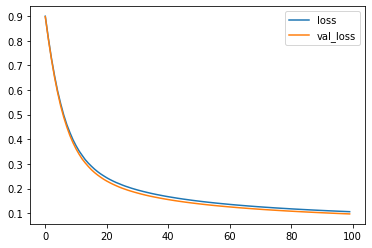

In [24]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

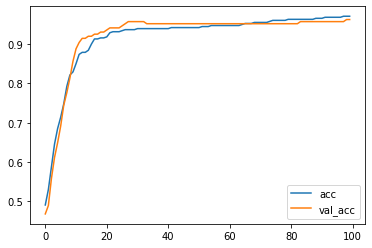

In [25]:
# Plot accuracy
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [26]:
# make predictions
P = model.predict(X_test)
print(P)

[[9.9750268e-01]
 [9.6514785e-01]
 [9.4499469e-01]
 [6.7860872e-01]
 [9.5413196e-01]
 [9.8927647e-01]
 [2.3911930e-14]
 [9.5278788e-01]
 [9.8021197e-01]
 [1.0738295e-05]
 [6.3805281e-05]
 [2.0458043e-02]
 [9.9786144e-01]
 [9.9138319e-01]
 [9.9358106e-01]
 [1.8729568e-03]
 [9.6641016e-01]
 [3.5935640e-04]
 [9.9449635e-01]
 [7.9846990e-01]
 [9.9808526e-01]
 [1.2380302e-02]
 [9.8503840e-01]
 [9.8927039e-01]
 [5.7909042e-01]
 [2.3578474e-01]
 [9.9687874e-01]
 [9.5002854e-01]
 [9.9332118e-01]
 [9.7411060e-01]
 [6.8352848e-02]
 [9.1249931e-01]
 [9.9514776e-01]
 [9.7596681e-01]
 [8.0251694e-04]
 [4.9400333e-01]
 [9.9864864e-01]
 [9.9778086e-01]
 [9.8183012e-01]
 [9.7691762e-01]
 [2.9047132e-03]
 [3.3448014e-05]
 [3.3428992e-06]
 [6.0267492e-05]
 [2.9402375e-03]
 [6.7093170e-01]
 [9.5954061e-01]
 [9.1163933e-01]
 [2.9252470e-03]
 [9.1934693e-01]
 [8.9505029e-01]
 [9.2177451e-01]
 [9.9564052e-01]
 [9.9544132e-01]
 [2.6112795e-04]
 [1.3463825e-02]
 [9.5837843e-01]
 [2.6987386e-01]
 [9.3986356e-0

In [27]:
# round and flatten to size (N,) instead of (N, 1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]


In [28]:
# calculate the accuracy and compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9627659574468085
6/6 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9628
Evaluate output: [0.09686853736639023, 0.9627659320831299]


In [29]:
# Save Model
model.save('linearclassifier.h5')

In [30]:
# Check model exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Aug 18 11:28 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Jul 30 16:30 sample_data


In [31]:
# load the model
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9628


[0.09686853736639023, 0.9627659320831299]